# Project 02

## Problem Statement

- The **aim** of this project is to predict property sales prices for each house using data processing.
- To predict the sale price of the property, I used Linear Regression Model.


Import Modulus

In [392]:
#Important libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt       
import sklearn.preprocessing as skpp   #I prefer importing everything at one go
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.metrics as skm

In [393]:
# Import data
# Read the data
train_file = './datasets/train.csv'
# Train Data
df_train = pd.read_csv(train_file)


In [394]:
# Test Data
test_file = './datasets/test.csv'
df_test = pd.read_csv(test_file)

# Baseline


In [395]:
df_train['SalePrice'].mean()

181469.70160897123

* Therefore the average price of a property in our dataset is 181,469.7$

## Data Cleaning and EDA

#### Train Data

In [396]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [397]:
df_train.shape

(2051, 81)

In [398]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

###### Check the data

In [399]:
# Data types
df_train.iloc[:, :20].dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
dtype: object

In [400]:
df_train.iloc[:, 20:40].dtypes

Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
dtype: object

In [401]:
df_train.iloc[:, 40:60].dtypes

Heating             object
Heating QC          object
Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
dtype: object

In [402]:
df_train.iloc[:, 60:].dtypes

Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

In [403]:
print(df_train.iloc[:, :40].isnull().sum())

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
dtype: int64


In [404]:
df_train.iloc[:, 40:].isnull().sum()

Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars           1
Garage Area           1
Garage Qual         114
Garage Cond         114
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Pool QC            2042
Fence              1651
Misc Feature       1986
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
SalePrice             0
dtype: int64

### Comment
- I think all data types of features are correctly represented.
- For some feature there are missing values.
    The features thas have missing values are:
        - Lot Frontage        330                     
        - Alley               1911     
        - Mas Vnr Type        22
        - Mas Vnr Area        22
        - Bsmt Qual           55
        - Bsmt Cond           55
        - Bsmt Exposure       58
        - BsmtFin Type 1      55
        - BsmtFin SF 1         1
        - BsmtFin Type 2      56
        - BsmtFin SF 2         1
        - Bsmt Unf SF          1
        - Total Bsmt SF        1
        - Fireplace Qu       1000
        - Garage Type         113
        - Garage Yr Blt       114
        - Garage Finish       114
        - Garage Cars           1
        - Garage Area           1
        - Garage Qual         114
        - Garage Cond         114
        - Pool QC            2042
        - Fence              1651
        - Misc Feature       1986

### Data Cleaning


In [405]:
#Fixing 'Lot frontage': replacing null values with the median as we don't want to drop any observations
df_train['Lot Frontage'].fillna(df_train["Lot Frontage"].median(),inplace=True)

In [406]:
#Filling empty values in Alley with 'NA'
df_train["Alley"].fillna('NA',inplace=True)
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [407]:
df_train['Mas Vnr Type'].fillna('NA',inplace=True)    
df_train['Mas Vnr Area'].fillna(-1.0,inplace=True)

In [408]:
df_train['Bsmt Qual'].fillna('NA',inplace=True) 
df_train['Bsmt Cond'].fillna('NA',inplace=True) 
df_train['Bsmt Exposure'].fillna('NA',inplace=True) 
df_train['BsmtFin Type 1'].fillna('NA',inplace=True) 
df_train['BsmtFin Type 2'].fillna('NA',inplace=True)  

In [409]:
#checking where are these null values
df_train[df_train["BsmtFin SF 1"].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [410]:
df_train.loc[1327,'BsmtFin SF 1']= -1.0

In [411]:
df_train[df_train["BsmtFin SF 1"].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [412]:
df_train[df_train["BsmtFin SF 2"].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [413]:
df_train.loc[1327,'BsmtFin SF 2']= -1.0

In [414]:
df_train[df_train["Bsmt Unf SF"].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [415]:
df_train.loc[1327,'Bsmt Unf SF']= -1.0

In [416]:
df_train[df_train['Total Bsmt SF'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [417]:
df_train.loc[1327,'Total Bsmt SF']= -1.0

In [418]:
df_train[df_train['Bsmt Full Bath'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [419]:
df_train.loc[616,'Bsmt Full Bath']= -1.0
df_train.loc[1327,'Bsmt Full Bath']= -1.0

In [420]:
df_train[df_train['Bsmt Half Bath'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [421]:
df_train.loc[616,'Bsmt Half Bath']= -1.0
df_train.loc[1327,'Bsmt Half Bath']= -1.0

In [422]:
df_train.isnull().sum()[0:40]

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
dtype: int64

In [423]:
df_train.isnull().sum()[40:81]

Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        0
Bsmt Half Bath        0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars           1
Garage Area           1
Garage Qual         114
Garage Cond         114
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Pool QC            2042
Fence              1651
Misc Feature       1986
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
SalePrice             0
dtype: int64

In [424]:
df_train['Fireplace Qu'].fillna('NA',inplace=True) 
df_train['Garage Type'].fillna('NA',inplace=True)
df_train['Garage Finish'].fillna('NA',inplace=True)
df_train['Garage Qual'].fillna('NA',inplace=True)
df_train['Garage Cond'].fillna('NA',inplace=True)
df_train['Pool QC'].fillna('NA',inplace=True)
df_train['Fence'].fillna('NA',inplace=True)
df_train['Misc Feature'].fillna('NA',inplace=True)

In [425]:
df_train['Garage Cars'].fillna(df_train['Garage Cars'].mode()[0],inplace=True)
df_train['Garage Area'].fillna(df_train['Garage Area'].mean(),inplace=True)
df_train['Garage Yr Blt'].fillna(df_train['Garage Yr Blt'].mode()[0],inplace=True)

In [426]:
df_train.isnull().sum()[40:81]

Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Pool QC            0
Fence              0
Misc Feature       0
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
dtype: int64

All Data are imputed successfully.


## EDA

In [427]:
import seaborn as sns

### General Approach:
- Since I was given 80 features, I followed a simple approach to choose 32 highly correlated features to predict Sales Price of a property. I used boxplots to correlate all other features with the Sales Price. 
- In the following plots the x-axis represents different features of our dataset and y-axis represents the SalePrice of a property. The boxes represent most of the distribution of the respective features. The dots represents outliers. 
- If the boxes for different categories of the respective feature are in the same range, or there are many null values, or there are many outliers, I have dropped that feature.

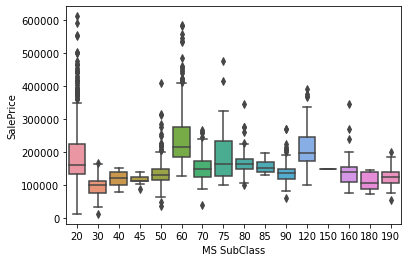

In [428]:
sns.boxplot(x="MS SubClass", y="SalePrice", data=df_train);

In [429]:
df_test.drop(["MS SubClass"], axis=1, inplace=True)

- The mean of "MS SubClass" is are different but they are similar.

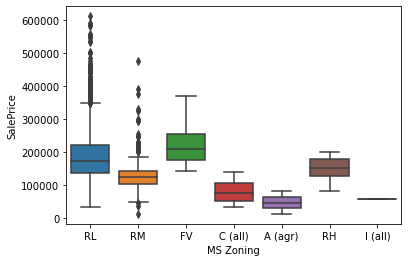

In [430]:
sns.boxplot(x="MS Zoning", y="SalePrice", data=df_train);

- The median of "MS Zoining" of houses appear to affect sale price.

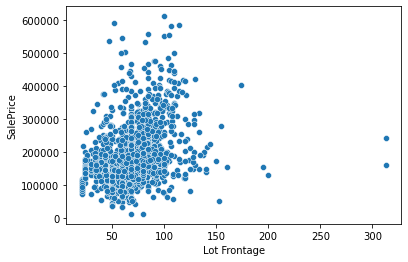

In [431]:
# Lot Frontage
sns.scatterplot(x="Lot Frontage", y="SalePrice", data=df_train);

In [432]:
df_train.drop(["Lot Frontage"], axis=1, inplace=True)
df_test.drop(["Lot Frontage"], axis=1, inplace=True)


   - There is a weak correlation between the "Lot Frontage" and the price.
   - Hence, We remove "Lot Frontage" feature.


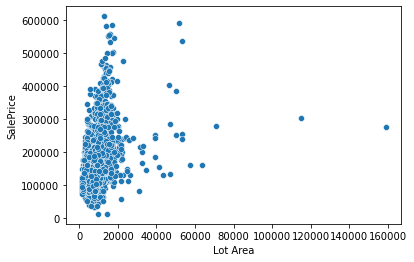

In [433]:
# Lot Area
sns.scatterplot(x="Lot Area", y="SalePrice", data=df_train);

In [434]:
df_train.drop(["Lot Area"], axis=1, inplace=True)
df_test.drop(["Lot Area"], axis=1, inplace=True)

- There is a weak correlation between the "Lot Area" and the price.
- Hence, We remove "Lot Area" feature.


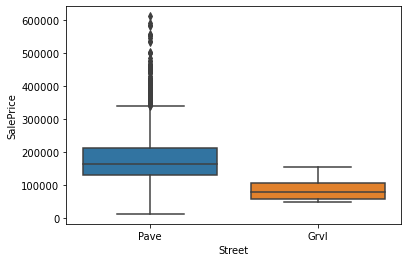

In [435]:
sns.boxplot(x="Street", y="SalePrice", data=df_train);

- The "Street" feature affect to the price

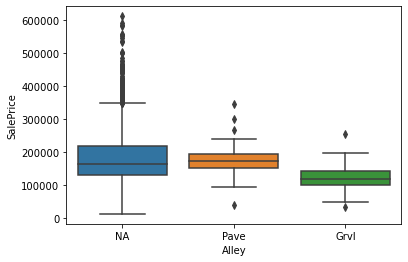

In [436]:
sns.boxplot(x="Alley", y="SalePrice", data=df_train);

In [437]:
df_train.drop(["Alley"], axis=1, inplace=True)
df_test.drop(["Alley"], axis=1, inplace=True)

- They are too many unknown Alley features, so we drop it.

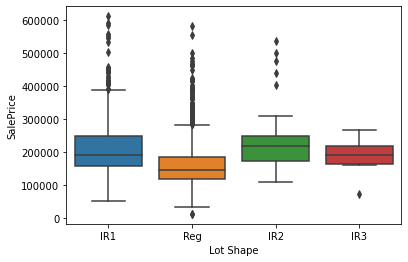

In [438]:
sns.boxplot(x="Lot Shape", y="SalePrice", data=df_train);

In [439]:
df_train.drop(["Lot Shape"], axis=1, inplace=True)
df_test.drop(["Lot Shape"], axis=1, inplace=True)

- We think these medians of this feature does not affect to the sale price.

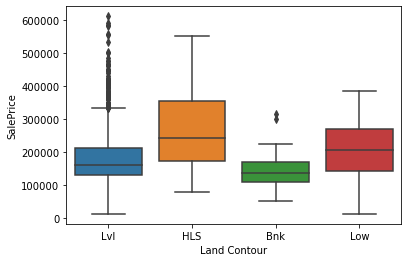

In [440]:
sns.boxplot(x="Land Contour", y="SalePrice", data=df_train);

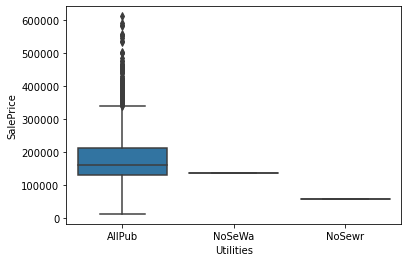

In [441]:
sns.boxplot(x="Utilities", y="SalePrice", data=df_train);

In [442]:
df_train.drop(["Utilities"], axis=1, inplace=True)
df_test.drop(["Utilities"], axis=1, inplace=True)

- Most of this feature is AllPub, so we drop it.

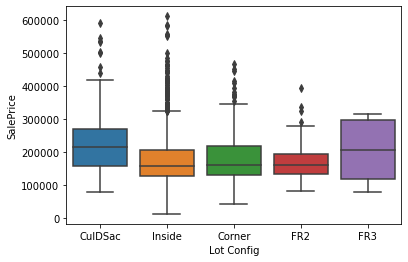

In [443]:
sns.boxplot(x="Lot Config", y="SalePrice", data=df_train);

In [444]:
df_train.drop(["Lot Config"], axis=1, inplace=True)
df_test.drop(["Lot Config"], axis=1, inplace=True)

- We think these medians of this feature does not affect to the sale price.

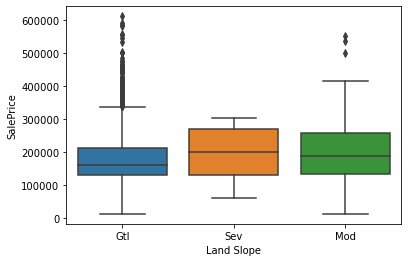

In [445]:
sns.boxplot(x="Land Slope", y="SalePrice", data=df_train);

In [446]:
df_train.drop(["Land Slope"], axis=1, inplace=True)
df_test.drop(["Land Slope"], axis=1, inplace=True)

- We think these medians of this feature does not affect to the sale price.

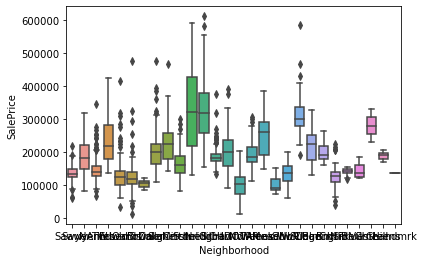

In [447]:
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train);

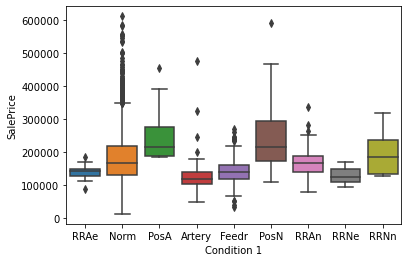

In [448]:
sns.boxplot(x="Condition 1", y="SalePrice", data=df_train);

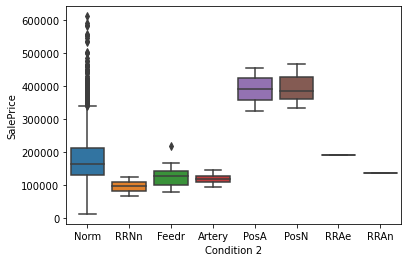

In [449]:
sns.boxplot(x="Condition 2", y="SalePrice", data=df_train);

In [450]:
df_train.drop(["Condition 2"], axis=1, inplace=True)

In [451]:
df_test.drop(["Condition 2"], axis=1, inplace=True)

- Most of this feature is Norm, so we drop it.

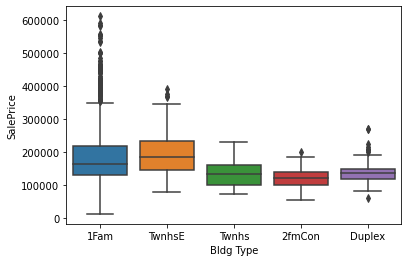

In [452]:
sns.boxplot(x="Bldg Type", y="SalePrice", data=df_train);

In [453]:
df_train.drop(["Bldg Type"], axis=1, inplace=True)

In [454]:
df_test.drop(["Bldg Type"], axis=1, inplace=True)

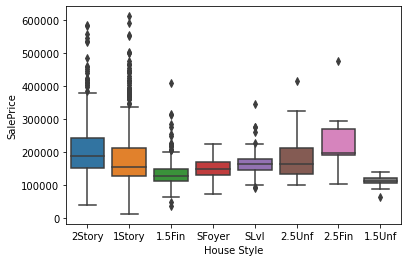

In [455]:
sns.boxplot(x="House Style", y="SalePrice", data=df_train);

In [456]:
df_train.drop(["House Style"], axis=1, inplace=True)
df_test.drop(["House Style"], axis=1, inplace=True)


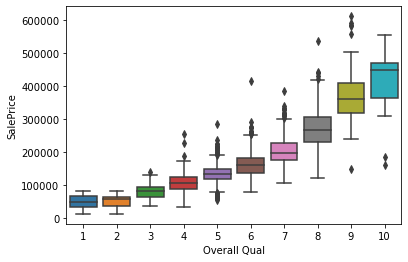

In [457]:
# Overall Quality
sns.boxplot(x="Overall Qual", y="SalePrice", data=df_train);

* SalePrice increases with the increase in Overall Qual

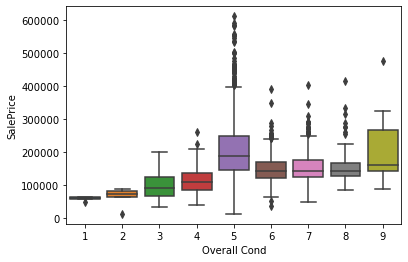

In [458]:
sns.boxplot(x="Overall Cond", y="SalePrice", data=df_train);

In [459]:
df_train.drop(["Overall Cond"], axis=1, inplace=True)
df_test.drop(["Overall Cond"], axis=1, inplace=True)

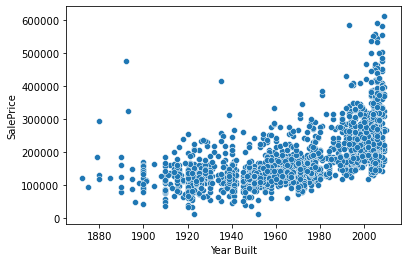

In [460]:
sns.scatterplot(x="Year Built", y="SalePrice", data=df_train);

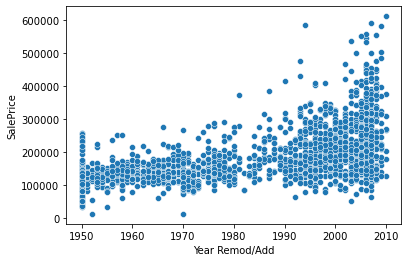

In [461]:
sns.scatterplot(x="Year Remod/Add", y="SalePrice", data=df_train);

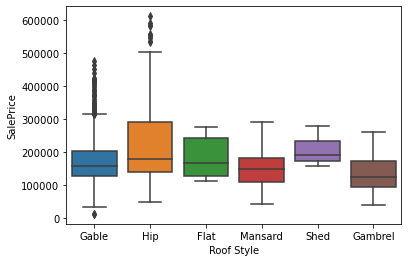

In [462]:
sns.boxplot(x="Roof Style", y="SalePrice", data=df_train);

In [463]:
df_train.drop(["Roof Style"], axis=1, inplace=True)
df_test.drop(["Roof Style"], axis=1, inplace=True)

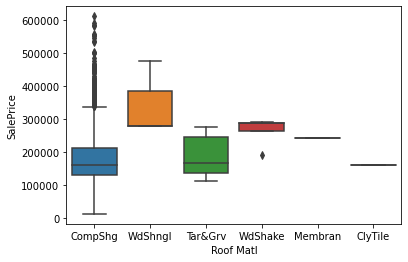

In [464]:
sns.boxplot(x="Roof Matl", y="SalePrice", data=df_train);

In [465]:
df_train.drop(["Roof Matl"], axis=1, inplace=True)
df_test.drop(["Roof Matl"], axis=1, inplace=True)

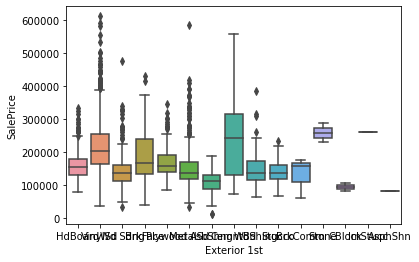

In [466]:
sns.boxplot(x="Exterior 1st", y="SalePrice", data=df_train);

In [467]:
df_train.drop(["Exterior 1st"], axis=1, inplace=True)
df_test.drop(["Exterior 1st"], axis=1, inplace=True)

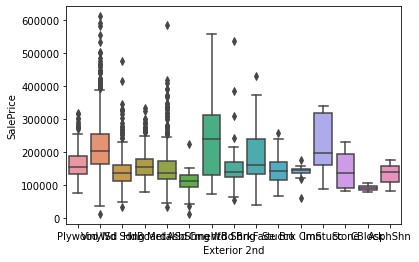

In [468]:
sns.boxplot(x="Exterior 2nd", y="SalePrice", data=df_train);

In [469]:
df_train.drop(["Exterior 2nd"], axis=1, inplace=True)
df_test.drop(["Exterior 2nd"], axis=1, inplace=True)

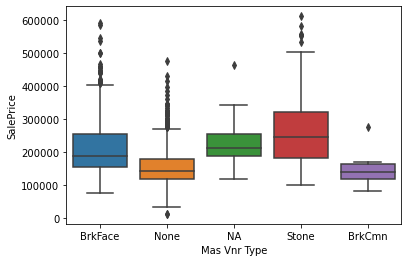

In [470]:
sns.boxplot(x="Mas Vnr Type", y="SalePrice", data=df_train);

In [471]:
df_train.drop(["Mas Vnr Type"], axis=1, inplace=True)
df_test.drop(["Mas Vnr Type"], axis=1, inplace=True)

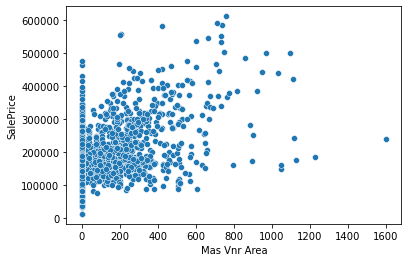

In [472]:
sns.scatterplot(x="Mas Vnr Area", y="SalePrice", data=df_train);

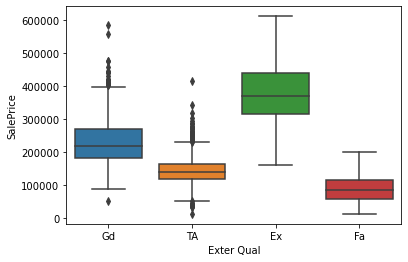

In [473]:
sns.boxplot(x="Exter Qual", y="SalePrice", data=df_train);

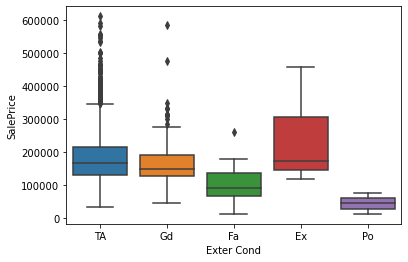

In [474]:
sns.boxplot(x="Exter Cond", y="SalePrice", data=df_train);

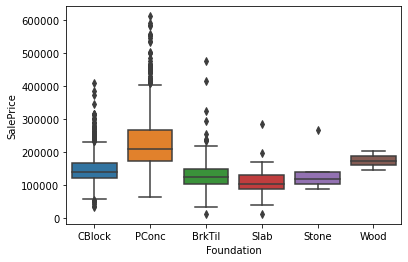

In [475]:
sns.boxplot(x="Foundation", y="SalePrice", data=df_train);

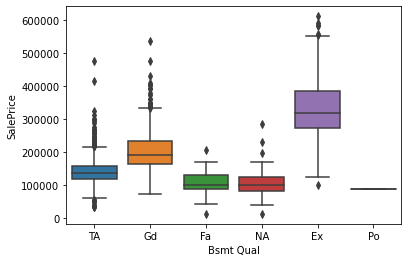

In [476]:
sns.boxplot(x="Bsmt Qual", y="SalePrice", data=df_train);

In [477]:
df_train.drop(["Bsmt Qual"], axis=1, inplace=True)
df_test.drop(["Bsmt Qual"], axis=1, inplace=True)

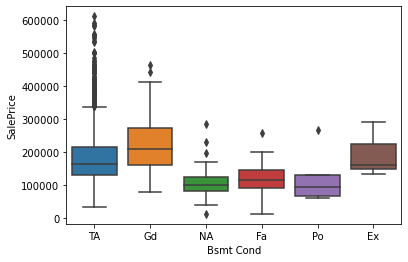

In [478]:
sns.boxplot(x="Bsmt Cond", y="SalePrice", data=df_train);

In [479]:
df_train.drop(["Bsmt Cond"], axis=1, inplace=True)
df_test.drop(["Bsmt Cond"], axis=1, inplace=True)

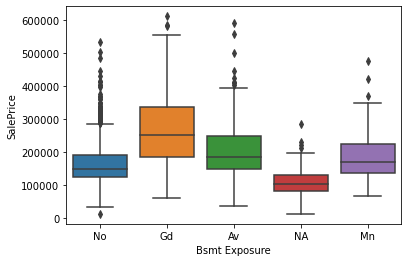

In [480]:
sns.boxplot(x="Bsmt Exposure", y="SalePrice", data=df_train);

In [481]:
df_train.drop(["Bsmt Exposure"], axis=1, inplace=True)
df_test.drop(["Bsmt Exposure"], axis=1, inplace=True)

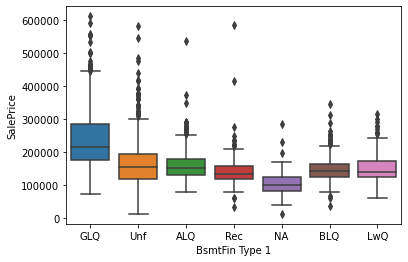

In [482]:
sns.boxplot(x="BsmtFin Type 1", y="SalePrice", data=df_train);

In [483]:
df_train.drop(["BsmtFin Type 1"], axis=1, inplace=True)
df_test.drop(["BsmtFin Type 1"], axis=1, inplace=True)

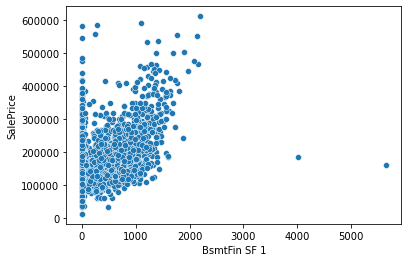

In [484]:
sns.scatterplot(x="BsmtFin SF 1", y="SalePrice", data=df_train);

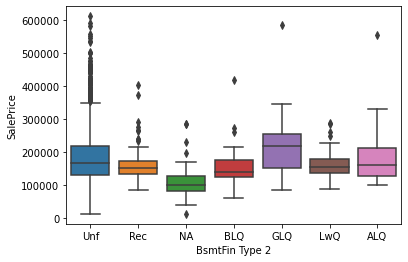

In [485]:
sns.boxplot(x="BsmtFin Type 2", y="SalePrice", data=df_train);

In [486]:
df_train.drop(["BsmtFin Type 2"], axis=1, inplace=True)
df_test.drop(["BsmtFin Type 2"], axis=1, inplace=True)

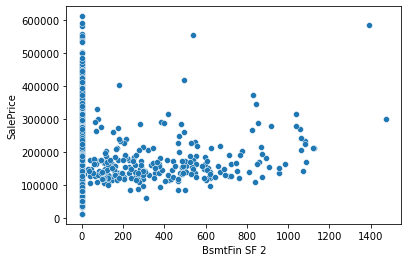

In [487]:
sns.scatterplot(x="BsmtFin SF 2", y="SalePrice", data=df_train);

In [488]:
df_train.drop(["BsmtFin SF 2"], axis=1, inplace=True)
df_test.drop(["BsmtFin SF 2"], axis=1, inplace=True)

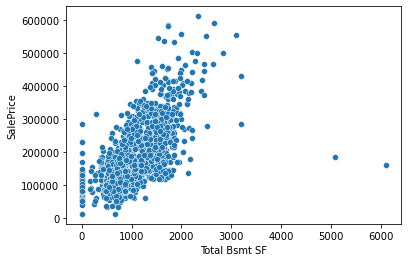

In [489]:
sns.scatterplot(x="Total Bsmt SF", y="SalePrice", data=df_train);

- There seems to be strong relation ship between Total Bsmt SF and sale price.

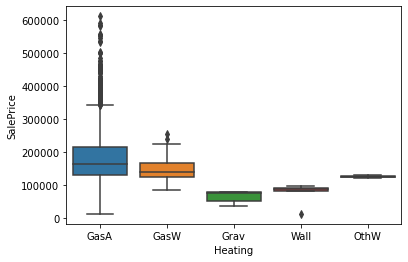

In [490]:
sns.boxplot(x="Heating", y="SalePrice", data=df_train);

In [491]:
df_train.drop(["Heating"], axis=1, inplace=True)
df_test.drop(["Heating"], axis=1, inplace=True)

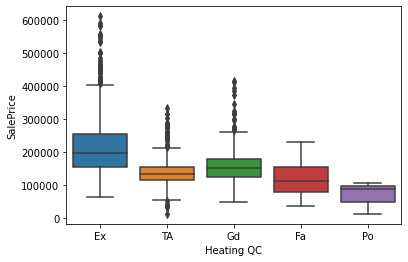

In [492]:
sns.boxplot(x="Heating QC", y="SalePrice", data=df_train);

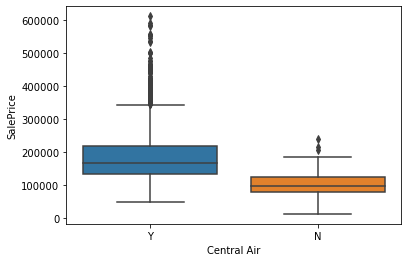

In [493]:
sns.boxplot(x="Central Air", y="SalePrice", data=df_train);

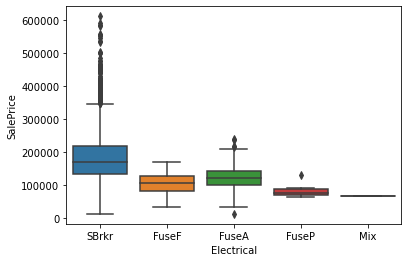

In [494]:
sns.boxplot(x="Electrical", y="SalePrice", data=df_train);

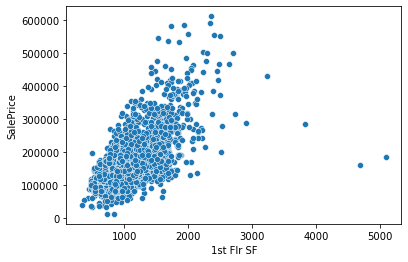

In [495]:
sns.scatterplot(x="1st Flr SF", y="SalePrice", data=df_train);

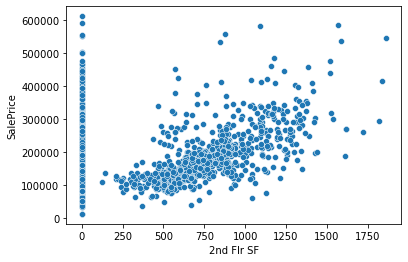

In [496]:
sns.scatterplot(x="2nd Flr SF", y="SalePrice", data=df_train);

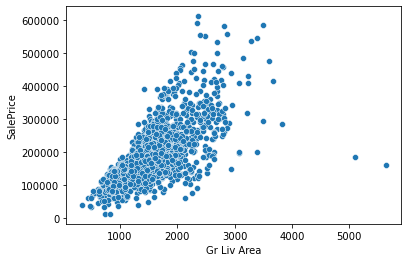

In [497]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_train);

In [498]:
df_train.drop(["1st Flr SF", "2nd Flr SF"], axis=1, inplace=True)
df_test.drop(["1st Flr SF", "2nd Flr SF"], axis=1, inplace=True)

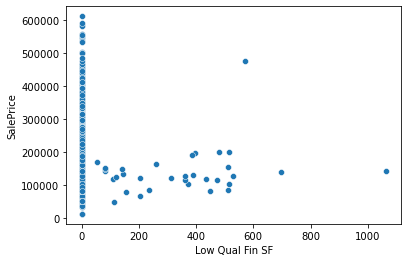

In [499]:
sns.scatterplot(x="Low Qual Fin SF", y="SalePrice", data=df_train);

In [500]:
df_train.drop(["Low Qual Fin SF"], axis=1, inplace=True)

In [501]:
df_test.drop(["Low Qual Fin SF"], axis=1, inplace=True)

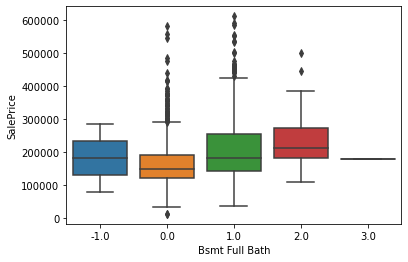

In [502]:
sns.boxplot(x="Bsmt Full Bath", y="SalePrice", data=df_train);

In [503]:
df_train.drop(["Bsmt Full Bath"], axis=1, inplace=True)
df_test.drop(["Bsmt Full Bath"], axis=1, inplace=True)

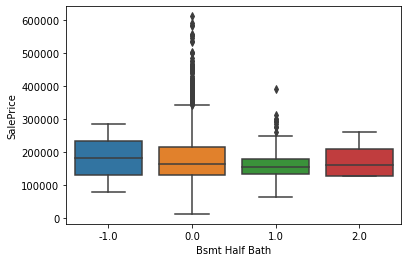

In [504]:
sns.boxplot(x="Bsmt Half Bath", y="SalePrice", data=df_train);

In [505]:
df_train.drop(["Bsmt Half Bath"], axis=1, inplace=True)
df_test.drop(["Bsmt Half Bath"], axis=1, inplace=True)

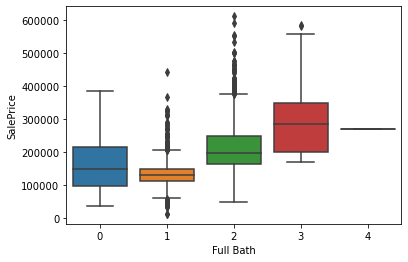

In [506]:
sns.boxplot(x="Full Bath", y="SalePrice", data=df_train);

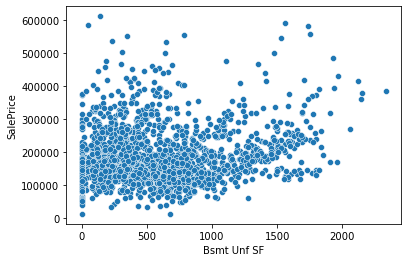

In [507]:
sns.scatterplot(x="Bsmt Unf SF", y="SalePrice", data=df_train);

In [508]:
df_train.drop(["Bsmt Unf SF"], axis=1, inplace=True)
df_test.drop(["Bsmt Unf SF"], axis=1, inplace=True)

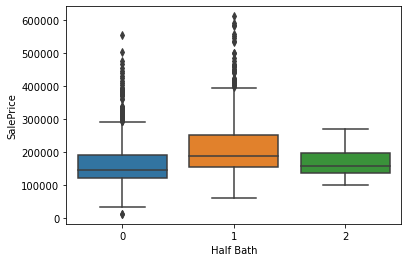

In [509]:
sns.boxplot(x="Half Bath", y="SalePrice", data=df_train);

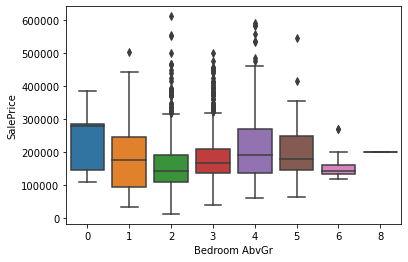

In [510]:
sns.boxplot(x="Bedroom AbvGr", y="SalePrice", data=df_train);

In [511]:
df_train.drop(["Bedroom AbvGr"], axis=1, inplace=True)
df_test.drop(["Bedroom AbvGr"], axis=1, inplace=True)

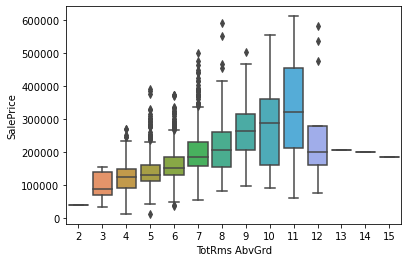

In [512]:
sns.boxplot(x="TotRms AbvGrd", y="SalePrice", data=df_train);

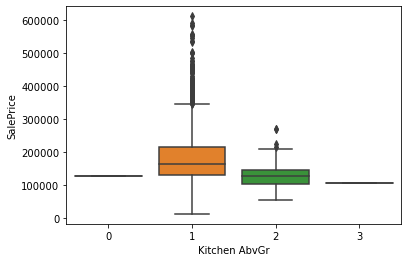

In [513]:
sns.boxplot(x="Kitchen AbvGr", y="SalePrice", data=df_train);

In [514]:
df_train.drop(["Kitchen AbvGr"], axis=1, inplace=True)
df_test.drop(["Kitchen AbvGr"], axis=1, inplace=True)

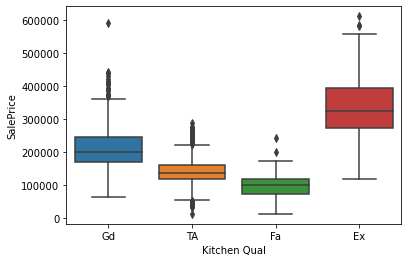

In [515]:
sns.boxplot(x="Kitchen Qual", y="SalePrice", data=df_train);

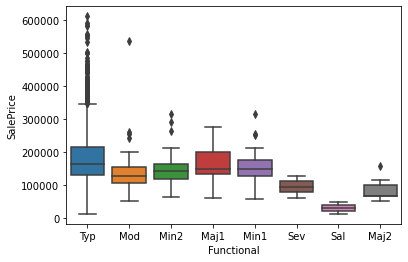

In [516]:
sns.boxplot(x="Functional", y="SalePrice", data=df_train);

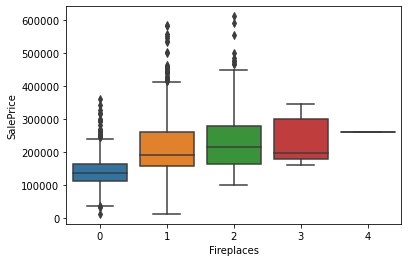

In [517]:
sns.boxplot(x="Fireplaces", y="SalePrice", data=df_train);

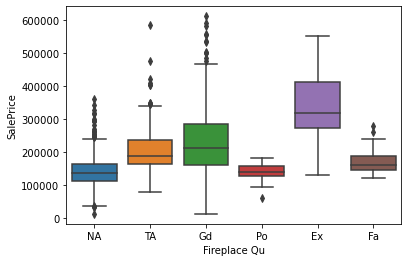

In [518]:
sns.boxplot(x="Fireplace Qu", y="SalePrice", data=df_train);

In [519]:
df_train.drop(["Fireplace Qu"], axis=1, inplace=True)
df_test.drop(["Fireplace Qu"], axis=1, inplace=True)

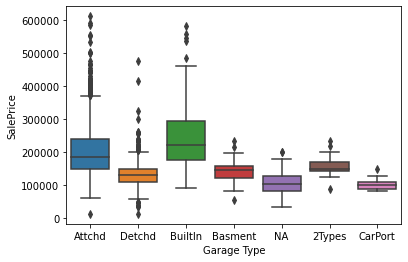

In [520]:
sns.boxplot(x="Garage Type", y="SalePrice", data=df_train);

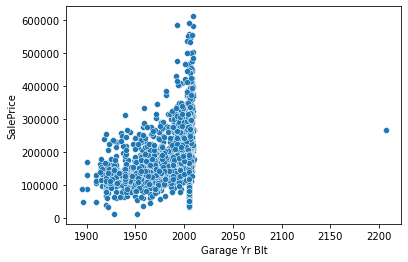

In [521]:
sns.scatterplot(x="Garage Yr Blt", y="SalePrice", data=df_train);

In [522]:
df_train.drop(["Garage Yr Blt"], axis=1, inplace=True)
df_test.drop(["Garage Yr Blt"], axis=1, inplace=True)

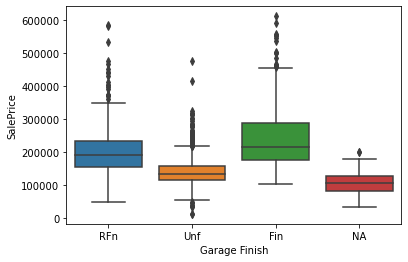

In [523]:
sns.boxplot(x="Garage Finish", y="SalePrice", data=df_train);

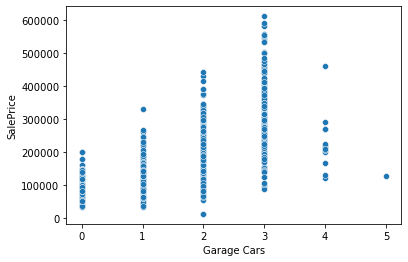

In [524]:
sns.scatterplot(x="Garage Cars", y="SalePrice", data=df_train);

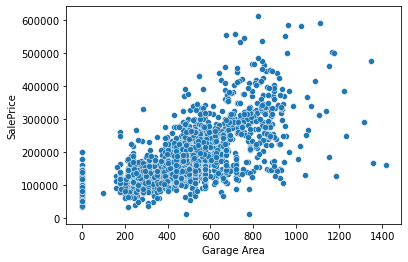

In [525]:
sns.scatterplot(x="Garage Area", y="SalePrice", data=df_train);

In [526]:
df_train.drop(["Garage Qual"], axis=1, inplace=True)
df_test.drop(["Garage Qual"], axis=1, inplace=True)

In [527]:
df_train.drop(["Garage Cond"], axis=1, inplace=True)
df_test.drop(["Garage Cond"], axis=1, inplace=True)

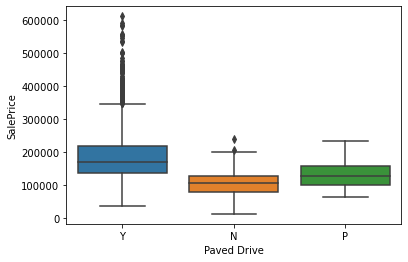

In [528]:
sns.boxplot(x="Paved Drive", y="SalePrice", data=df_train);

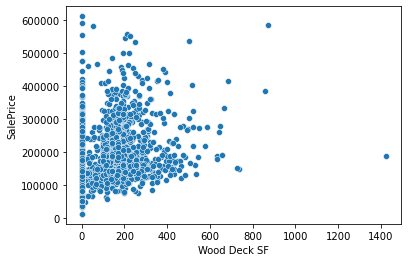

In [529]:
sns.scatterplot(x="Wood Deck SF", y="SalePrice", data=df_train);

In [530]:
df_train.drop(["Wood Deck SF"], axis=1, inplace=True)
df_test.drop(["Wood Deck SF"], axis=1, inplace=True)

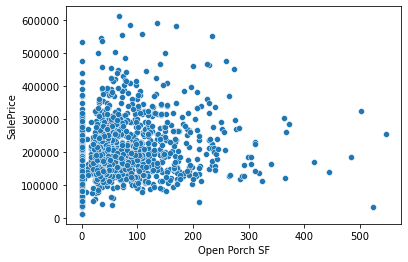

In [531]:
sns.scatterplot(x="Open Porch SF", y="SalePrice", data=df_train);

In [532]:
df_train.drop(["Open Porch SF"], axis=1, inplace=True)
df_test.drop(["Open Porch SF"], axis=1, inplace=True)

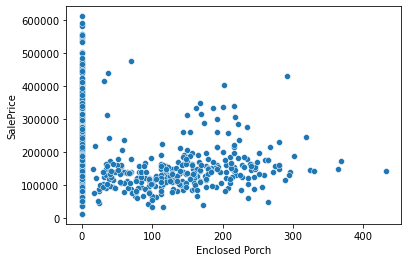

In [533]:
sns.scatterplot(x="Enclosed Porch", y="SalePrice", data=df_train);

In [534]:
df_train.drop(["Enclosed Porch"], axis=1, inplace=True)
df_test.drop(["Enclosed Porch"], axis=1, inplace=True)

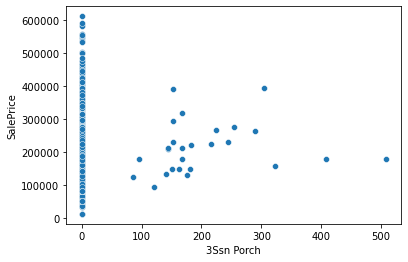

In [535]:
sns.scatterplot(x="3Ssn Porch", y="SalePrice", data=df_train);

In [536]:
df_train.drop(["3Ssn Porch"], axis=1, inplace=True)
df_test.drop(["3Ssn Porch"], axis=1, inplace=True)

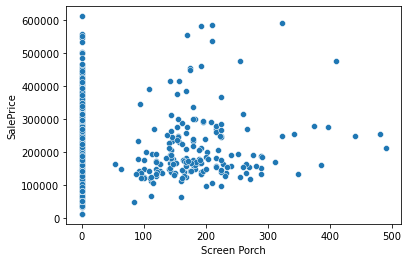

In [537]:
sns.scatterplot(x="Screen Porch", y="SalePrice", data=df_train);

In [538]:
df_train.drop(["Screen Porch"], axis=1, inplace=True)
df_test.drop(["Screen Porch"], axis=1, inplace=True)

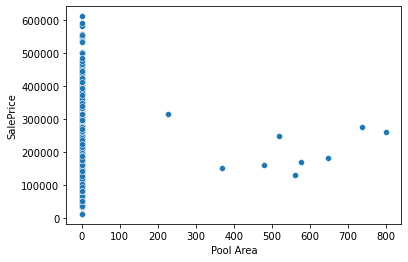

In [539]:
sns.scatterplot(x="Pool Area", y="SalePrice", data=df_train);

In [540]:
df_train.drop(["Pool Area"], axis=1, inplace=True)
df_test.drop(["Pool Area"], axis=1, inplace=True)

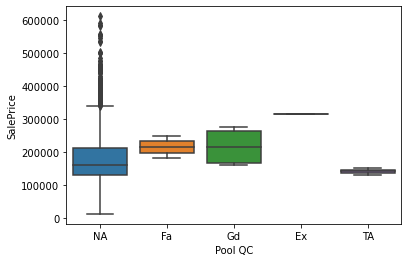

In [541]:
sns.boxplot(x="Pool QC", y="SalePrice", data=df_train);

In [542]:
df_train.drop(["Pool QC"], axis=1, inplace=True)
df_test.drop(["Pool QC"], axis=1, inplace=True)

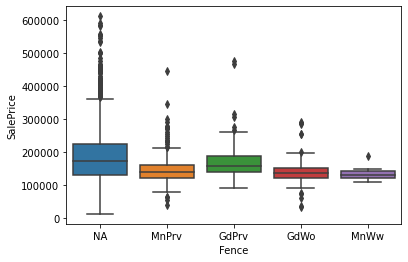

In [543]:
sns.boxplot(x="Fence", y="SalePrice", data=df_train);

In [544]:
df_train.drop(["Fence"], axis=1, inplace=True)
df_test.drop(["Fence"], axis=1, inplace=True)

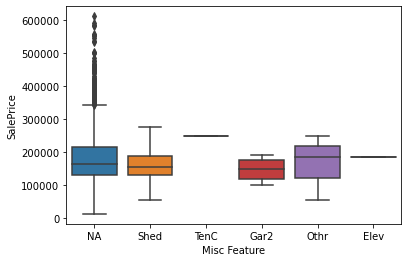

In [545]:
sns.boxplot(x="Misc Feature", y="SalePrice", data=df_train);

In [546]:
df_train.drop(["Misc Feature"], axis=1, inplace=True)
df_test.drop(["Misc Feature"], axis=1, inplace=True)

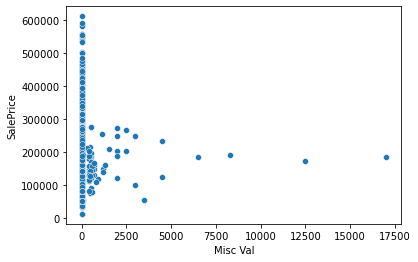

In [547]:
sns.scatterplot(x="Misc Val", y="SalePrice", data=df_train);

In [548]:
df_train.drop(["Misc Val"], axis=1, inplace=True)
df_test.drop(["Misc Val"], axis=1, inplace=True)

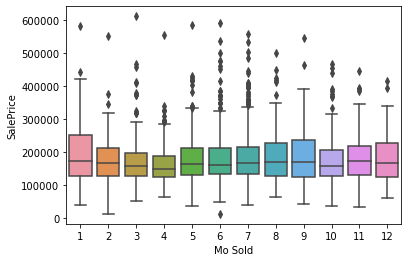

In [549]:
sns.boxplot(x="Mo Sold", y="SalePrice", data=df_train);

In [550]:
df_train.drop(["Mo Sold"], axis=1, inplace=True)
df_test.drop(["Mo Sold"], axis=1, inplace=True)

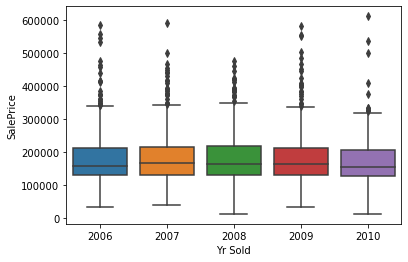

In [551]:
sns.boxplot(x="Yr Sold", y="SalePrice", data=df_train);

In [552]:
df_train.drop(["Yr Sold"], axis=1, inplace=True)
df_test.drop(["Yr Sold"], axis=1, inplace=True)

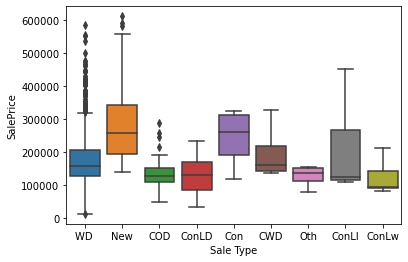

In [553]:
sns.boxplot(x="Sale Type", y="SalePrice", data=df_train);

In [554]:
# All Features to be used
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour',
       'Neighborhood', 'Condition 1', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'Sale Type', 'SalePrice'],
      dtype='object')

In [555]:
# size of dataframe
df_train.shape

(2051, 34)

## All those features are dropped which were not correlated with our y (SalePrice)

In [556]:
print(df_test.iloc[:, :].isnull().sum())

Id                 0
PID                0
MS Zoning          0
Street             0
Land Contour       0
Neighborhood       0
Condition 1        0
Overall Qual       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       1
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
Total Bsmt SF      0
Heating QC         0
Central Air        0
Electrical         1
Gr Liv Area        0
Full Bath          0
Half Bath          0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Type       44
Garage Finish     45
Garage Cars        0
Garage Area        0
Paved Drive        0
Sale Type          0
dtype: int64


In [557]:
df_test["Mas Vnr Area"] = df_test["Mas Vnr Area"].fillna(-1.0)
df_test["Electrical"] = df_test["Electrical"].fillna("SBrkr")
df_test["Garage Type"] = df_test["Garage Type"].fillna("NA")
df_test["Garage Finish"] = df_test["Garage Finish"].fillna("NA")

In [558]:
print(df_test.iloc[:, :].isnull().sum())

Id                0
PID               0
MS Zoning         0
Street            0
Land Contour      0
Neighborhood      0
Condition 1       0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
BsmtFin SF 1      0
Total Bsmt SF     0
Heating QC        0
Central Air       0
Electrical        0
Gr Liv Area       0
Full Bath         0
Half Bath         0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Garage Type       0
Garage Finish     0
Garage Cars       0
Garage Area       0
Paved Drive       0
Sale Type         0
dtype: int64


In [559]:
# save the EDA dataset
df_train.to_csv("./datasets/train_clean_and_eda.csv")
df_test.to_csv("./datasets/test_clean_and_eda.csv")

#  Model Preparation

In [560]:
# Choose target feature
df_y = df_train['SalePrice']

In [561]:
# Features
features = [f for f in df_train.columns if f != 'SalePrice']
# Join train and test datasets 
df_X = df_train[features].append(df_test)
df_X.drop(["Id","PID"], axis=1, inplace=True)
df_X.drop(["Garage Type","Garage Finish"], axis=1, inplace=True)
df_X.iloc[:, :10].head()

,MS SubClass,MS Zoning,Street,Land Contour,Neighborhood,Condition 1,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area
0,60.0,RL,Pave,Lvl,Sawyer,RRAe,6,1976,2005,289.0
1,60.0,RL,Pave,Lvl,SawyerW,Norm,7,1996,1997,132.0
2,20.0,RL,Pave,Lvl,NAmes,Norm,5,1953,2007,0.0
3,60.0,RL,Pave,Lvl,Timber,Norm,5,2006,2007,0.0
4,50.0,RL,Pave,Lvl,SawyerW,Norm,6,1900,1993,0.0


In [562]:
df_X.iloc[:, 10:20].head()

,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Full Bath
0,Gd,TA,CBlock,533.0,725.0,Ex,Y,SBrkr,1479,2
1,Gd,TA,PConc,637.0,913.0,Ex,Y,SBrkr,2122,2
2,TA,Gd,CBlock,731.0,1057.0,TA,Y,SBrkr,1057,1
3,TA,TA,PConc,0.0,384.0,Gd,Y,SBrkr,1444,2
4,TA,TA,PConc,0.0,676.0,TA,Y,SBrkr,1445,2


In [563]:
df_X.iloc[:, 20:].head()

,Half Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Sale Type
0,1,Gd,6,Typ,0,2.0,475.0,Y,WD
1,1,Gd,8,Typ,1,2.0,559.0,Y,WD
2,0,Gd,5,Typ,0,1.0,246.0,Y,WD
3,1,TA,7,Typ,0,2.0,400.0,Y,WD
4,0,TA,6,Typ,0,2.0,484.0,N,WD


In [564]:
df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
Overall Qual,2929.0,6.093547,1.409420,1.0,5.0,6.0,7.0,10.0
Year Built,2929.0,1971.344145,30.243350,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2929.0,1984.258450,20.859235,1950.0,1965.0,1993.0,2004.0,2010.0
Mas Vnr Area,2929.0,100.863435,178.251403,-1.0,0.0,0.0,162.0,1600.0
BsmtFin SF 1,2929.0,441.857631,454.424487,-1.0,0.0,370.0,734.0,5644.0
Total Bsmt SF,2929.0,1050.542847,439.354323,-1.0,793.0,990.0,1300.0,6110.0
Gr Liv Area,2929.0,1498.606009,502.174926,334.0,1126.0,1442.0,1742.0,5642.0
Full Bath,2929.0,1.566064,0.552400,0.0,1.0,2.0,2.0,4.0
Half Bath,2929.0,0.379310,0.502584,0.0,0.0,0.0,1.0,2.0


In [565]:
# Convert Categorial features into dummies.
category=['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Neighborhood', 
         'Condition 1', 'Overall Qual',  'Exter Qual', 'Exter Cond', 'Foundation', 
         'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual','Functional',
         'Paved Drive','Sale Type']
continous = [f for f in df_X if f not in category]
dum = pd.get_dummies(data=df_X, columns=category, drop_first=True)
dum.head()

,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,...,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,1976,2005,289.0,533.0,725.0,1479,2,1,6,0,...,1,0,0,0,0,0,0,0,0,1
1,1996,1997,132.0,637.0,913.0,2122,2,1,8,1,...,1,0,0,0,0,0,0,0,0,1
2,1953,2007,0.0,731.0,1057.0,1057,1,0,5,0,...,1,0,0,0,0,0,0,0,0,1
3,2006,2007,0.0,0.0,384.0,1444,2,1,7,0,...,1,0,0,0,0,0,0,0,0,1
4,1900,1993,0.0,0.0,676.0,1445,2,0,6,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling

In [566]:
#https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
ss = skpp.StandardScaler()
df_ss = pd.DataFrame(ss.fit_transform(dum), columns=dum.columns)
df_ss.head()

,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,...,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0.153973,0.994528,1.055637,0.200601,-0.741084,-0.039049,0.785682,1.235207,-0.281050,-0.924835,...,0.323830,-0.064139,-0.041352,-0.094637,-0.055517,-0.052333,-0.297394,-0.048945,-0.018481,0.39366
1,0.815388,0.610939,0.174708,0.429501,-0.313110,1.241600,0.785682,1.235207,0.992261,0.618664,...,0.323830,-0.064139,-0.041352,-0.094637,-0.055517,-0.052333,-0.297394,-0.048945,-0.018481,0.39366
2,-0.606655,1.090425,-0.565946,0.636391,0.014699,-0.879537,-1.024910,-0.754849,-0.917705,-0.924835,...,0.323830,-0.064139,-0.041352,-0.094637,-0.055517,-0.052333,-0.297394,-0.048945,-0.018481,0.39366
3,1.146096,1.090425,-0.565946,-0.972512,-1.517355,-0.108758,0.785682,1.235207,0.355605,-0.924835,...,0.323830,-0.064139,-0.041352,-0.094637,-0.055517,-0.052333,-0.297394,-0.048945,-0.018481,0.39366
4,-2.359406,0.419145,-0.565946,-0.972512,-0.852630,-0.106766,0.785682,-0.754849,-0.281050,-0.924835,...,-3.088037,-0.064139,-0.041352,-0.094637,-0.055517,-0.052333,-0.297394,-0.048945,-0.018481,0.39366


### Tain test split

In [567]:
y_train = df_y

In [568]:
X_train = df_ss[:df_train.shape[0]]#didn't require to use train_test_split fnction as
X_test = df_ss[df_train.shape[0]:] #we already had different train and test csv files

### Instantiate models

In [569]:
# linear regression
lr = sklm.LinearRegression()
# Lasso
lasso = sklm.LassoCV()
# Ridge
ridge = sklm.RidgeCV()

### Cross Validation

In [570]:
lr_scores = skms.cross_val_score(lr, X_train, y_train)
lr_scores.mean()

-1.4206892215475286e+24

In [571]:
lasso_scores = skms.cross_val_score(lasso, X_train, y_train)
lasso_scores.mean()

0.865010937029929

In [572]:
ridge_scores = skms.cross_val_score(ridge, X_train, y_train)
ridge_scores.mean()

0.8647776969806904

### Model Fitting

In [573]:
yp_lr=lr.fit(X_train, y_train).predict(X_train)
yp_lasso=lasso.fit(X_train, y_train).predict(X_train)
yp_ridge=ridge.fit(X_train, y_train).predict(X_train)

In [574]:
# RMSE
rmse_lr=skm.mean_squared_error(y_train, yp_lr,squared=False) 
rmse_lr    #if squared is True than it is MSE

26262.83371674721

In [575]:
rmse_lasso=skm.mean_squared_error(y_train, yp_lasso,squared=False)
rmse_lasso

26461.007919424934

In [576]:
rmse_ridge=skm.mean_squared_error(y_train, yp_ridge,squared=False)
rmse_ridge

26286.375452605793

### Comment:
- The linear regression model has smallest **RMSE**.
- **RMSE** is the square root of MSE (Mean squared error).
- **MSE** is the average of the squared residuals.
- **Low RMSE** means better fit.

In [577]:
prediction = lr.fit(X_train, y_train).predict(X_test)

In [578]:
# Coefficients
coeffients = {k: v for k, v in zip(X_train, lr.fit(X_train, y_train).coef_)}
df_coeff = pd.DataFrame(coeffients, index=['coefficient']) # Convert to Data frame
df_coeff.head()

,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,...,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
coefficient,5668.404175,3663.431116,2164.605065,7356.631267,880.216405,22128.191047,3305.761386,2179.81662,-1411.391292,4783.328006,...,720.12213,829.472788,2181.165971,1218.584604,253.0369,305.860868,4573.596102,1166.103779,1.082276e+13,3123.914665


In [579]:
# Sortting
df_coeff = df_coeff.T
df_coeff = df_coeff.sort_values(by=['coefficient'], ascending=False)
df_coeff

,coefficient
Kitchen Qual_Po,4.625108e+15
Sale Type_VWD,1.082276e+13
Gr Liv Area,2.212819e+04
Overall Qual_9,1.722132e+04
Overall Qual_8,1.666925e+04
...,...
MS SubClass_160.0,-8.556375e+03
Exter Qual_Gd,-8.814951e+03
Kitchen Qual_Gd,-1.022183e+04
Exter Qual_TA,-1.169633e+04


In [580]:
df_coeff[:15]

,coefficient
Kitchen Qual_Po,4.625108e+15
Sale Type_VWD,1.082276e+13
Gr Liv Area,2.212819e+04
Overall Qual_9,1.722132e+04
Overall Qual_8,1.666925e+04
Overall Qual_7,1.211198e+04
Overall Qual_6,9.957473e+03
Overall Qual_10,8.821959e+03
Overall Qual_5,7.832608e+03
BsmtFin SF 1,7.356631e+03


In [581]:
# Save the Predictions
df_final = pd.concat([df_test['Id'], pd.DataFrame(prediction)], axis=1)
df_final.columns = ['Id', 'SalePrice']
df_final.to_csv("./datasets/output.csv", index=False)

In [582]:
df_final['SalePrice'].head(25).mean()

168461.119375

#### This mean is very close to our Baseline score ($181,469.7)

## **My Audience:** Real Estate Agents

### **Conclusion And Recommendations:** 
- Out of the given 80 features, following **32 features** are highly correlated with the Sales Price of a property : 
       ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour',
       'Neighborhood', 'Condition 1', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'Sale Type', 'SalePrice']
       
- The feature, **Gr Liv Area** has the largest coefficient. This shows that the Area of the grade (ground) living area appear to add the most value to a home price.
- **Kitchen Qual_Po** has the largest negative coefficient. This tells us poor Kitchen quality hurt the value of a home the most.
- **Main Recommendation:** 
To correctly predict the SalesPrice of a property you all (real estate agents) should focus on the above mentioned 32 features. In order to increase the saleprice of a house try to improve **Gr Liv Area, overall quality of home, increase car capacity of garage, increase Type 1 finished area** and **Kitchen Qual_Po** quality, as you guys know that with the increase in sale price your share will increase too. 
- **Note:** In New York State, the standard real estate agent commission is 5- 6% of the property price.
- I think that this model will generalize to other cities too.